In [1]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [4]:
train_path1 = 'chest_xray/train/NORMAL'
train_path2 = 'chest_xray/train/PNEUMONIA'

In [5]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if 'mask' not in filename:
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)  # Load image in unchanged format
            if img is not None:
                img = cv2.resize(img, (64, 64))  # Resize image to 64x64 pixels
                images.append(img.flatten())  # Flatten the image to a 1D array
                labels.append(label)
    return images, labels

In [10]:
images_0, labels_0 = load_images_from_folder(train_path1, 0)
images_1, labels_1 = load_images_from_folder(train_path2, 1)

In [71]:
images_0_resized = [cv2.resize(img, (150, 150)) for img in images_0]
images_1_resized = [cv2.resize(img, (150, 150)) for img in images_1]

In [72]:
X_train = np.array(images_0_resized + images_1_resized)
y_train = np.array(labels_0 + labels_1)

In [73]:
print(X_train.shape)
print(y_train.shape)

(624, 150, 150)
(624,)


In [74]:
#X_train = np.expand_dims(X_train, axis=-1)

In [75]:
train_path3 = 'chest_xray/val/NORMAL'
train_path4 = 'chest_xray/val/PNEUMONIA'

In [76]:
images_0, labels_0 = load_images_from_folder(train_path3, 0)
images_1, labels_1 = load_images_from_folder(train_path4, 1)

In [77]:
images_0_resized = [cv2.resize(img, (150, 150)) for img in images_0]
images_1_resized = [cv2.resize(img, (150, 150)) for img in images_1]

In [78]:
X_val = np.array(images_0_resized + images_1_resized)
y_val = np.array(labels_0 + labels_1)

In [79]:
print(X_val.shape)
print(y_val.shape)

(16, 150, 150)
(16,)


In [80]:
train_path5 = 'chest_xray/test/NORMAL'
train_path6 = 'chest_xray/test/PNEUMONIA'

images_0, labels_0 = load_images_from_folder(train_path5, 0)
images_1, labels_1 = load_images_from_folder(train_path6, 1)

images_0_resized = [cv2.resize(img, (150, 150)) for img in images_0]
images_1_resized = [cv2.resize(img, (150, 150)) for img in images_1]

X_test = np.array(images_0_resized + images_1_resized)
y_test = np.array(labels_0 + labels_1)

print(X_test.shape)
print(y_test.shape)

(624, 150, 150)
(624,)


In [81]:
model = tf.keras.Sequential([
    # Add layers here (e.g., Conv2D, Dense, etc.)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [94]:
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

In [95]:
model_history = model.fit(X_train,y_train,epochs=100, batch_size=100, validation_data=[X_val, y_val])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.6332 - loss: 0.6589 - val_accuracy: 0.5000 - val_loss: 0.7162
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6256 - loss: 0.6620 - val_accuracy: 0.5000 - val_loss: 0.7166
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5992 - loss: 0.6734 - val_accuracy: 0.5000 - val_loss: 0.7167
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6298 - loss: 0.6601 - val_accuracy: 0.5000 - val_loss: 0.7170
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.6448 - loss: 0.6535 - val_accuracy: 0.5000 - val_loss: 0.7173
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.6335 - loss: 0.6584 - val_accuracy: 0.5000 - val_loss: 0.7176
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.6420 - loss: 0.6545 - val_accuracy: 0.5000 - val_loss: 0.7179
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6535 - loss: 0.6493 - val_accuracy: 0.5000 - val_loss:

In [97]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 22500)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 256)                 │       5,760,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_71 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_72 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_73 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_74 (Dense)                     │ (None, 4)                   │              36 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_75 (Dense)                     │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,412,581 (66.42 MB)

 Trainable params: 5,804,193 (22.14 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 11,608,388 (44.28 MB)

In [98]:
y_prob = model.predict(X_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [99]:
y_pred = y_prob.argmax(axis=1)

In [102]:
accuracy_score(y_test,y_pred)
classification_report(y_test, y_pred)

C:\Users\sauvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sauvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sauvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

'              precision    recall  f1-score   support\n\n           0       0.38      1.00      0.55       234\n           1       0.00      0.00      0.00       390\n\n    accuracy                           0.38       624\n   macro avg       0.19      0.50      0.27       624\nweighted avg       0.14      0.38      0.20       624\n'

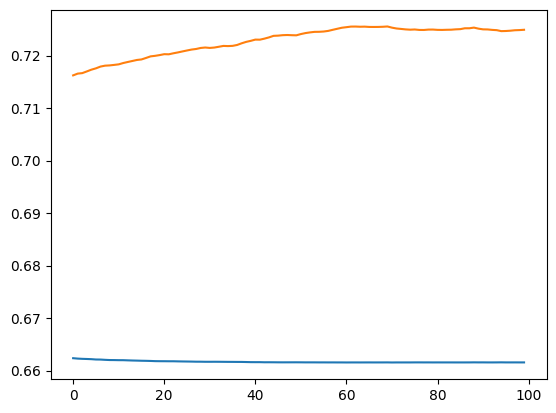

In [101]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])